In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

2023-01-15 12:53:41 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [3]:
df=pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [4]:
X_val, Y_val = (df["Year"].values, df["Value"].values)

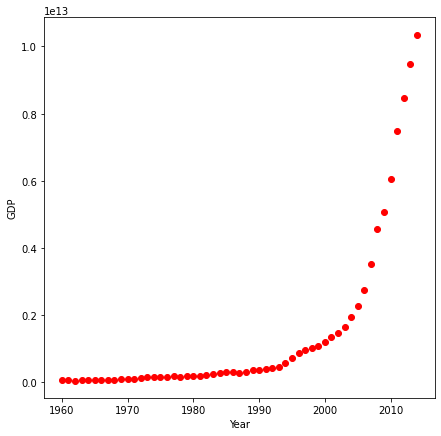

In [5]:
plt.figure(figsize=(7,7))
plt.plot(X_val,Y_val,'ro')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

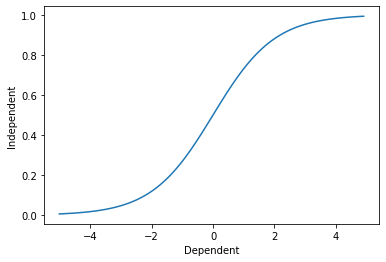

In [6]:
x1=np.arange(-5.0,5.0,0.1)
y1=1.0/(1.0+np.exp(-x1))
plt.plot(x1,y1)
plt.xlabel("Dependent")
plt.ylabel("Independent")
plt.show()

In [7]:
def sigmoid(x,beta1,beta2):
  y=1/(1+np.exp(-beta1*(x-beta2)))
  return y

<function matplotlib.pyplot.show(*args, **kw)>

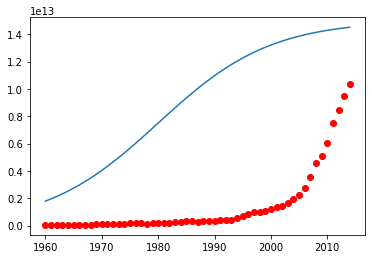

In [8]:
B1=0.10
B2=1980.0
y_predA=sigmoid(X_val,B1,B2)
plt.plot(X_val, y_predA*15000000000000)
plt.plot(X_val,Y_val,'ro')
plt.show

In [9]:
#normalise the values
X_N=X_val/max(X_val)
Y_N=Y_val/max(Y_val)

In [10]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_N, Y_N)
print("New beta1 and beta2 values:",popt)
print("Expected covariance values: ",pcov)

New beta1 and beta2 values: [690.45301897   0.99720713]
Expected covariance values:  [[ 1.52273884e+03 -2.88115933e-04]
 [-2.88115933e-04  7.25956453e-09]]


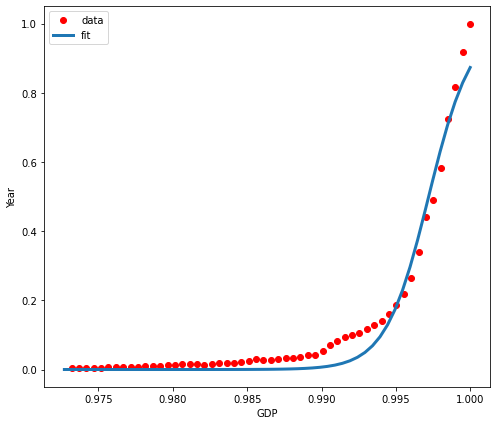

In [11]:
X=np.linspace(1960,2015,55)
X=X/max(X)
plt.figure(figsize=(8,7))
YN=sigmoid(X,*popt)
plt.plot(X_N,Y_N,'ro',label="data")
plt.plot(X,YN,linewidth=3.0,label="fit")
plt.legend(loc="best")
plt.xlabel("GDP")
plt.ylabel("Year")
plt.show()

In [12]:
from sklearn.metrics import r2_score
msk=np.random.rand(len(df))<0.8
X_train=X_N[msk]
X_test=X_N[~msk]
Y_train=X_N[msk]
Y_test=X_N[~msk]
popt,pcov=curve_fit(sigmoid,X_train,Y_train)
Y_pred=sigmoid(X_test,*popt)
print("r2: ",r2_score(Y_test,Y_pred))
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred - Y_test) ** 2))

r2:  0.9706429623547632
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
